In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
animals = pd.read_csv('horse.csv')

In [4]:
animals.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [7]:
total = animals.isnull().sum().sort_values(ascending=False)
percent = (animals.isnull().sum()/animals.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
nasogastric_reflux_ph,246,0.822742
abdomo_protein,198,0.662207
abdomo_appearance,165,0.551839
abdomen,118,0.394649
nasogastric_reflux,106,0.354515
nasogastric_tube,104,0.347826
rectal_exam_feces,102,0.341137
peripheral_pulse,69,0.230769
rectal_temp,60,0.200669
respiratory_rate,58,0.193980


In [10]:
df=animals[['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane',
'capillary_refill_time','pain','abdomo_appearance', 'peristalsis', 'abdominal_distention',
'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces','abdomen', 'surgical_lesion','cp_data','outcome' ]]

In [11]:
df.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,abdomo_appearance,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,surgical_lesion,cp_data,outcome
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,NaN,absent,severe,NaN,NaN,decreased,distend_large,no,no,died
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,cloudy,absent,slight,NaN,NaN,absent,other,no,no,euthanized
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,NaN,hypomotile,none,NaN,NaN,normal,normal,no,yes,lived
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,serosanguious,absent,severe,none,less_1_liter,decreased,NaN,yes,yes,died
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,died


In [15]:
df['surgery'] = df['surgery'].fillna(df['surgery'].dropna().mode().values[0] )
df['age'] = df['age'].fillna(df['age'].dropna().mode().values[0] )
df['temp_of_extremities'] = df['temp_of_extremities'].fillna(df['temp_of_extremities'].dropna().mode().values[0] )
df['peripheral_pulse'] = df['peripheral_pulse'].fillna(df['peripheral_pulse'].dropna().mode().values[0] )
df['mucous_membrane'] = df['mucous_membrane'].fillna(df['mucous_membrane'].dropna().mode().values[0] )
df['capillary_refill_time'] = df['capillary_refill_time'].fillna(df['capillary_refill_time'].dropna().mode().values[0] )
df['pain'] = df['pain'].fillna(df['pain'].dropna().mode().values[0] )
df['abdomo_appearance'] = df['abdomo_appearance'].fillna(df['abdomo_appearance'].dropna().mode().values[0] )
df['peristalsis'] = df['peristalsis'].fillna(df['peristalsis'].dropna().mode().values[0] )
df['abdominal_distention'] = df['abdominal_distention'].fillna(df['abdominal_distention'].dropna().mode().values[0] )
df['nasogastric_tube'] = df['nasogastric_tube'].fillna(df['nasogastric_tube'].dropna().mode().values[0] )
df['nasogastric_reflux'] = df['nasogastric_reflux'].fillna(df['nasogastric_reflux'].dropna().mode().values[0] )
df['rectal_exam_feces'] = df['rectal_exam_feces'].fillna(df['rectal_exam_feces'].dropna().mode().values[0] )
df['abdomen'] = df['abdomen'].fillna(df['abdomen'].dropna().mode().values[0] )
df['surgical_lesion'] = df['surgical_lesion'].fillna(df['surgical_lesion'].dropna().mode().values[0] )
df['cp_data'] = df['cp_data'].fillna(df['cp_data'].dropna().mode().values[0] )
df['outcome'] = df['outcome'].fillna(df['outcome'].dropna().mode().values[0] )




<ipython-input-15-1d20dceb544d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['surgery'] = df['surgery'].fillna(df['surgery'].dropna().mode().values[0] )
<ipython-input-15-1d20dceb544d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(df['age'].dropna().mode().values[0] )
<ipython-input-15-1d20dceb544d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
df.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,abdomo_appearance,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,surgical_lesion,cp_data,outcome,surgerytemp_of_extremities
0,no,adult,cool,reduced,normal_pink,more_3_sec,extreme_pain,cloudy,absent,severe,slight,none,decreased,distend_large,no,no,died,cool
1,yes,adult,cool,normal,pale_cyanotic,less_3_sec,mild_pain,cloudy,absent,slight,slight,none,absent,other,no,no,euthanized,cool
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,cloudy,hypomotile,none,slight,none,normal,normal,no,yes,lived,normal
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,serosanguious,absent,severe,none,less_1_liter,decreased,distend_large,yes,yes,died,cold
4,no,adult,cool,normal,dark_cyanotic,more_3_sec,mild_pain,cloudy,hypomotile,none,slight,none,absent,distend_large,no,no,died,cool


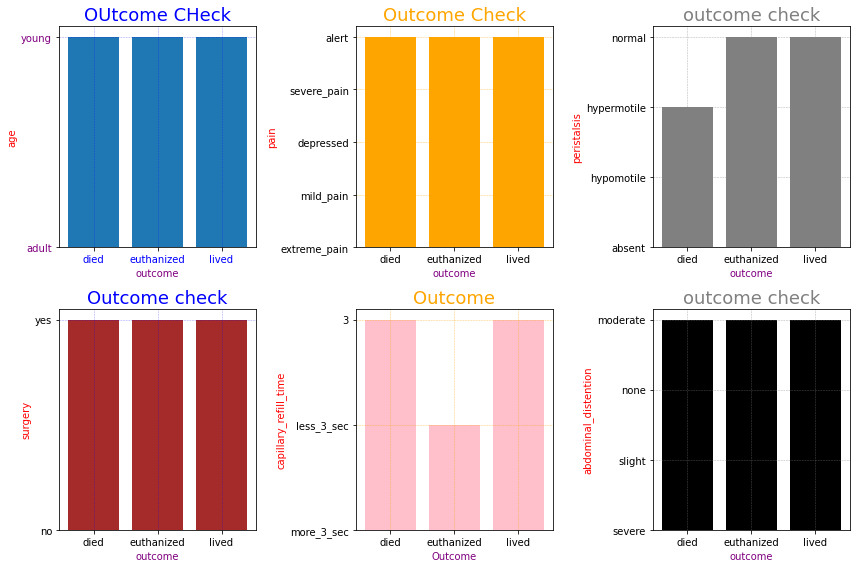

In [28]:
fig, ax = plt.subplots(2,3,figsize=(12,8))
ax[0][0].bar(df['outcome'],df['age'])
ax[0][0].set_title('OUtcome CHeck', color ='b',fontsize=18)
ax[0][0].set_ylabel('age', color ='r',fontsize=10)
ax[0][0].set_xlabel('outcome', color ='purple',fontsize=10)
ax[0][0].grid(ls='--', lw = '0.5',color ='b',alpha = 0.4)
for label in ax[0][0].get_xticklabels():
    label.set_color('b')
    
for label in ax[0][0].get_yticklabels():
    label.set_color('purple')
      
ax[0][1].bar(df['outcome'],df['pain'], color ='orange')
ax[0][1].set_title('Outcome Check', color ='orange',fontsize=18)
ax[0][1].set_ylabel('pain', color ='r',fontsize=10)
ax[0][1].set_xlabel('outcome', color ='purple',fontsize=10)
ax[0][1].grid(ls='--', lw = '0.5',color ='orange',alpha = 0.6)

ax[0][2].bar(df['outcome'],df['peristalsis'],color ='gray')
ax[0][2].set_title('outcome check', color ='gray',fontsize=18)
ax[0][2].set_ylabel('peristalsis', color ='r',fontsize=10)
ax[0][2].set_xlabel('outcome', color ='purple',fontsize=10)
ax[0][2].grid(ls='--', lw = '0.5',color ='gray',alpha = 0.6)



ax[1][0].bar(df['outcome'],df['surgery'], color = 'brown')
ax[1][0].set_title('Outcome check', color ='b',fontsize=18)
ax[1][0].set_ylabel('surgery', color ='r',fontsize=10)
ax[1][0].set_xlabel('outcome', color ='purple',fontsize=10)
ax[1][0].grid(ls='--', lw = '0.5',color ='b',alpha = 0.4)

ax[1][1].bar(df['outcome'],df['capillary_refill_time'], color ='pink')
ax[1][1].set_title('Outcome', color ='orange',fontsize=18)
ax[1][1].set_ylabel('capillary_refill_time', color ='r',fontsize=10)
ax[1][1].set_xlabel('Outcome', color ='purple',fontsize=10)
ax[1][1].grid(ls='--', lw = '0.5',color ='orange',alpha = 0.6)

ax[1][2].bar(df['outcome'],df['abdominal_distention'],color ='black')
ax[1][2].set_title('outcome check', color ='gray',fontsize=18)
ax[1][2].set_ylabel('abdominal_distention', color ='r',fontsize=10)
ax[1][2].set_xlabel('outcome', color ='purple',fontsize=10)
ax[1][2].grid(ls='--', lw = '0.5',color ='gray',alpha = 0.6)
plt.tight_layout()
plt.show()